# 🚀 Teletransporte Quântico - Como Star Trek, mas Real!

## 💡 A Ideia Básica

Imagine que Alice quer enviar uma informação quântica para Bob que está muito longe.

**Analogia:** É como enviar uma foto pelo celular, mas para informação quântica:
- Alice não pode simplesmente "copiar" o estado quântico (lei da mecânica quântica!)
- Mas se Alice e Bob compartilharem algo especial (emaranhamento), ela pode **transferir** o estado
- O estado original de Alice é destruído no processo

## 👥 Os Personagens

- **Alice** 👩: Tem um qubit misterioso (qubit 0) que quer teletransportar
- **Bob** 🧑: Vai receber o estado no seu qubit (qubit 2)
- **Par Emaranhado** ✨: Qubits 1 e 2 conectados quanticamente

## 📋 Os 5 Passos do Teletransporte

1. ✅ Criar o circuito
2. 🎯 Alice prepara seu qubit misterioso  
3. ⚡ Criar emaranhamento + medição de Bell
4. 📞 Alice mede e "liga" para Bob
5. 🔧 Bob faz correções e recebe o estado!

## Passo 0: Importar bibliotecas

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_state_city
from numpy import pi


## 1️⃣ Passo 1: Montar o "Palco" do Teletransporte

Vamos criar nosso circuito quântico - o "palco" onde tudo vai acontecer.

**O que precisamos:**

- **3 qubits** (q[0], q[1], q[2]) - nossos "atores" quânticos💡 **Pense como:** 3 moedas quânticas e 3 caixinhas para guardar resultados

  - q[0]: Qubit de Alice (o que será teletransportado)

  - q[1]: Metade do par emaranhado que fica com Alice

  - q[2]: Metade do par emaranhado que fica com Bob  

  - **3 bits clássicos** (c[0], c[1], c[2]) - para guardar resultados das medições

### 📐 Estado Matemático Inicial

No início, todos os qubits estão em $|0\rangle$:

$$|\psi_{\text{inicial}}\rangle = |q_0\rangle \otimes |q_1\rangle \otimes |q_2\rangle = |0\rangle \otimes |0\rangle \otimes |0\rangle = |000\rangle$$

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


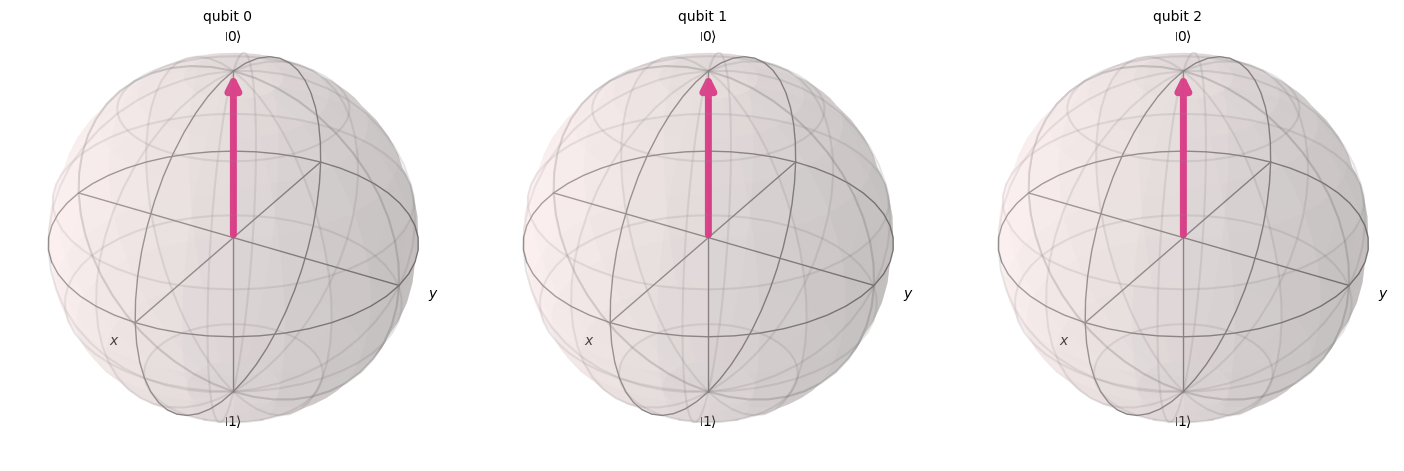

In [3]:

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.draw('mpl')

state1 = Statevector.from_instruction(circuit)
print(state1)
plot_bloch_multivector(state1)

## 2️⃣ Passo 2: Alice Prepara o "Pacote" a Enviar

**Alice** cria o estado que quer teletransportar no qubit 0.

🎁 **O que estamos enviando:** Estado |1⟩ (usando porta X)

🚧 **Barreira:** Separamos visualmente as etapas do circuito

💭 **Por que |1⟩?** Para facilitar a verificação! No final, se Bob receber |1⟩, sabemos que funcionou.

⚡ **Na vida real:** Poderia ser qualquer estado quântico |ψ⟩ = α|0⟩ + β|1⟩, mesmo que Alice não saiba os valores de α e β!

### 📐 Cálculo da Porta X

A porta X (NOT quântico) transforma:

$$X|0\rangle = |1\rangle$$

Matematicamente, a porta X é representada pela matriz de Pauli:

$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

Aplicando no qubit 0:

$$|\psi_1\rangle = (X \otimes I \otimes I)|000\rangle = |100\rangle = |1\rangle \otimes |0\rangle \otimes |0\rangle$$

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


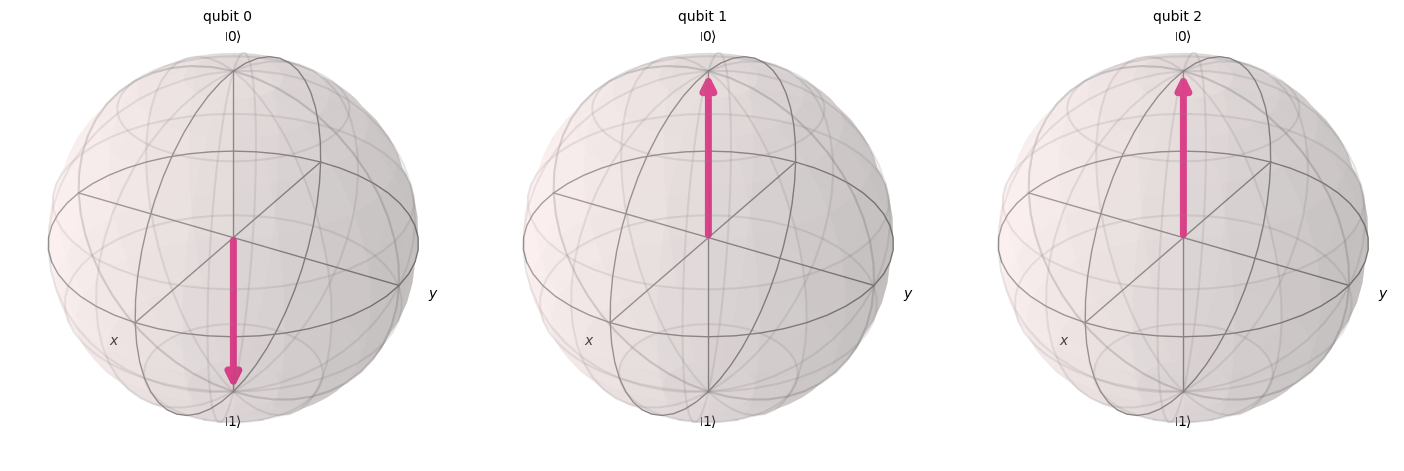

In [4]:

circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.draw('mpl')
state2 = Statevector.from_instruction(circuit)
print(state2)
plot_bloch_multivector(state2)

## 3️⃣ Passo 3: A Mágica Quântica - Emaranhamento!

Esta é a parte mais importante! Aqui acontece a "conexão mágica" entre Alice e Bob.

### 🔗 Parte A: Criar o "Telefone Quântico" (Par de Bell)

Alice e Bob precisam ter compartilhado um par de qubits emaranhados antes:

1. **H(q[1])** - Porta Hadamard: Coloca qubit 1 em superposição
   - Pense: "jogar uma moeda quântica que fica cara E coroa ao mesmo tempo"
   
2. **CNOT(q[1], q[2])** - Porta CNOT: Cria emaranhamento entre qubits 1 e 2
   - Pense: "conectar duas moedas quanticamente - se medir uma, a outra colapsa instantaneamente"
   - Estado criado: |Φ⁺⟩ = (|00⟩ + |11⟩)/√2

### 📡 Parte B: Alice Conecta seu Qubit ao Sistema

Agora Alice entrelaça SEU qubit com o par de Bell:

3. **CNOT(q[0], q[1])** - Conecta o qubit de Alice ao seu qubit do par
4. **H(q[0])** - Completa a "medição de Bell"

💡 **O que aconteceu?** O estado do qubit 0 foi "distribuído" pelo sistema emaranhado!



### 📐 Cálculo Matemático Detalhado

**Passo 3a - Aplicar Hadamard em q[1]:**

A porta Hadamard é:
$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

Aplicando $H$ no qubit 1:
$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Estado após H:
$$|\psi_2\rangle = |1\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle = \frac{1}{\sqrt{2}}(|100\rangle + |110\rangle) = 0.7071 (|100\rangle + |110\rangle)$$


Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


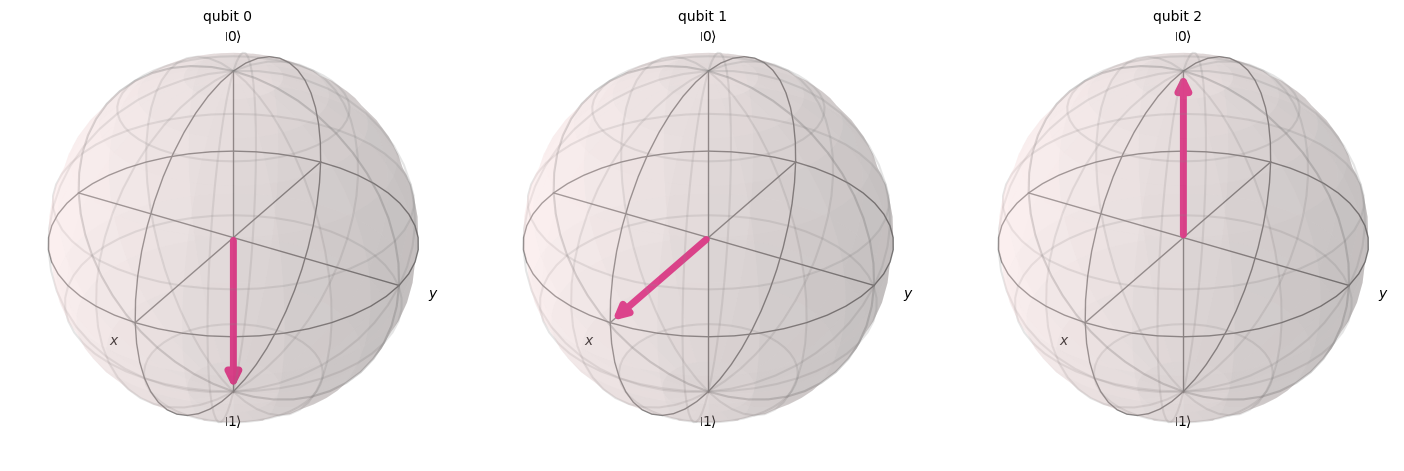

In [5]:
circuit.h(qreg_q[1])

state3 = Statevector.from_instruction(circuit)
print(state3)
plot_bloch_multivector(state3)

📊 **Interpretando a Esfera de Bloch:**

Observe o qubit q[1] na visualização acima - ele está agora **no equador da esfera, no eixo +X** (apontando para a direita ➡️).

Isso mostra visualmente a **superposição** criada por Hadamard:

| Posição na Bloch | Estado | Significado |
|------------------|--------|-------------|
| Polo Norte ⬆️ | $\|0\rangle$ | Estado puro "zero" |
| Polo Sul ⬇️ | $\|1\rangle$ | Estado puro "um" |
| Equador +X ➡️ | $\frac{1}{\sqrt{2}}(\|0\rangle + \|1\rangle)$ | **Superposição igual!** |
| Equador -X ⬅️ | $\frac{1}{\sqrt{2}}(\|0\rangle - \|1\rangle)$ | Superposição com fase |

O qubit no equador indica que ele tem **50% de chance** de ser medido como 0 ou 1 - está literalmente em ambos os estados ao mesmo tempo! ✨

⚠️ **Nota sobre visualizações:** A partir daqui, os qubits começam a ficar emaranhados. A esfera de Bloch mostra apenas o **estado reduzido** de cada qubit individual, mas **não captura as correlações quânticas** (emaranhamento). Para ver a estrutura completa do estado, vamos adicionar outras visualizações.


**Passo 3b - Aplicar CNOT entre q[1] e q[2]:**

A porta CNOT inverte o qubit alvo se o controle for |1⟩:
$$CNOT|00\rangle = |00\rangle, \quad CNOT|10\rangle = |11\rangle$$

Aplicando CNOT(q[1], q[2]):
$$|\psi_3\rangle = \frac{1}{\sqrt{2}}(|100\rangle + |111\rangle)$$

**🔗 Estado de Bell criado!** Os qubits 1 e 2 agora estão **emaranhados** - medindo um, sabemos instantaneamente o outro!

Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))

🌐 Q-Sphere (mostra amplitudes e fases do estado completo):


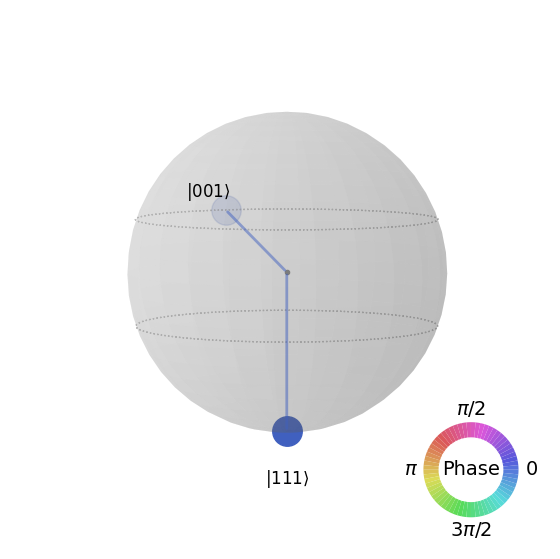

In [6]:
circuit.cx(qreg_q[1], qreg_q[2])

state4 = Statevector.from_instruction(circuit)
print(state4)

# Visualização na Q-Sphere - melhor para ver emaranhamento!
print("\n🌐 Q-Sphere (mostra amplitudes e fases do estado completo):")
plot_state_qsphere(state4)


**Passo 3c - Aplicar CNOT entre q[0] e q[1]:**

Agora q[0] é o controle e q[1] é o alvo:
$$|\psi_4\rangle = \frac{1}{\sqrt{2}}(|110\rangle + |101\rangle)$$

**✨ Emaranhamento triplo!** Agora os 3 qubits estão interconectados quanticamente.

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))

🏙️ State City (visualização 3D da matriz densidade):


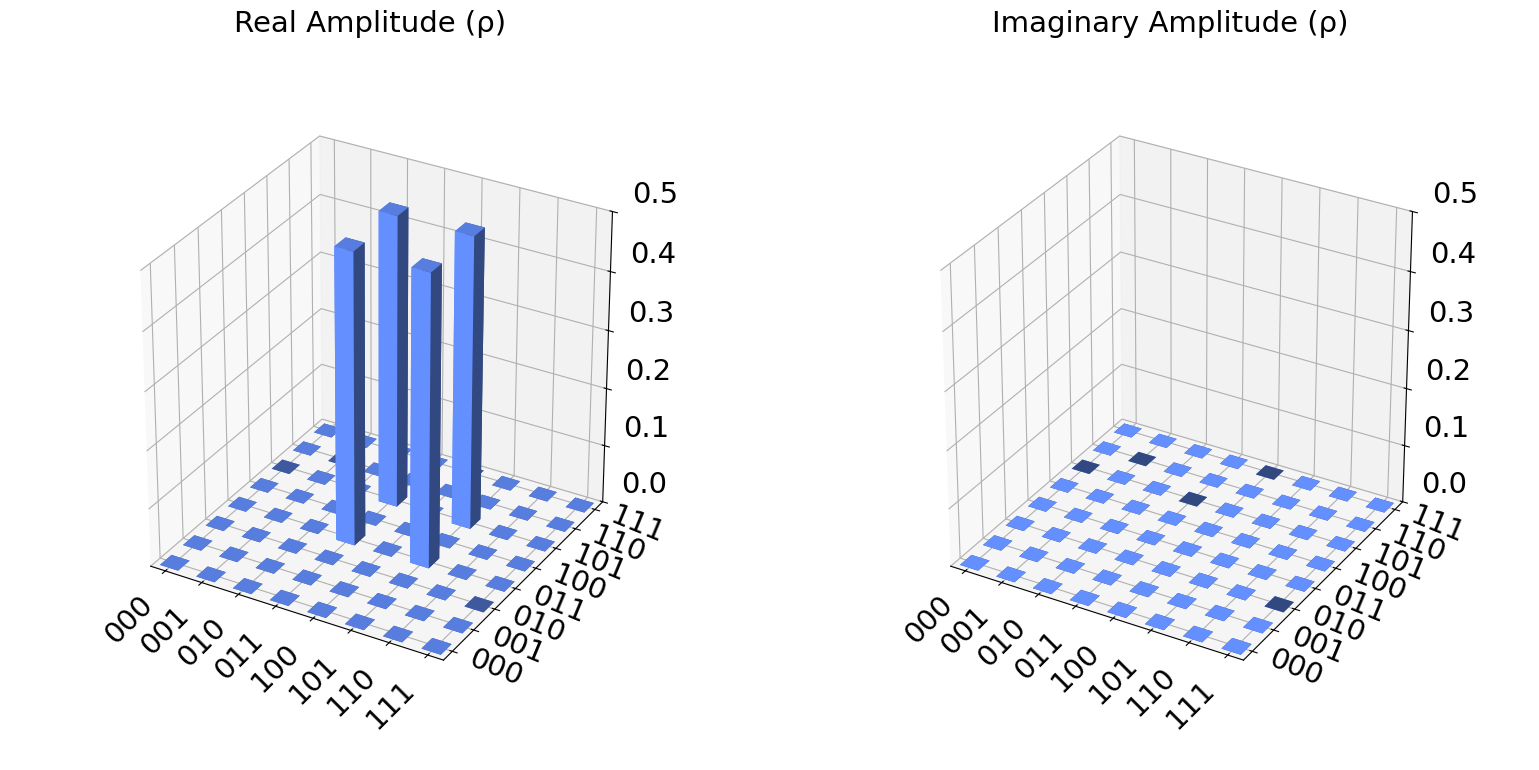

In [7]:
circuit.cx(qreg_q[0], qreg_q[1])

state5 = Statevector.from_instruction(circuit)
print(state5)

# Visualização "City" - mostra a matriz densidade
print("\n🏙️ State City (visualização 3D da matriz densidade):")
plot_state_city(state5)


**Passo 3d - Aplicar Hadamard em q[0]:**

Expandindo $H$ em cada componente:
$$H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

Estado final antes da medição:
$$|\psi_5\rangle = \frac{1}{2}(|010\rangle - |110\rangle + |001\rangle - |101\rangle)$$

Podemos reescrever agrupando os estados de Alice (q[0]q[1]) e Bob (q[2]):
$$|\psi_5\rangle = \frac{1}{2}[|00\rangle(|0\rangle - |1\rangle) + |01\rangle(|1\rangle - |0\rangle) + |10\rangle(|0\rangle + |1\rangle) + |11\rangle(|1\rangle + |0\rangle)]$$

Statevector([ 0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,
              0. +0.j,  0. +0.j],
            dims=(2, 2, 2))

🌐 Q-Sphere - Estado completo antes da medição:


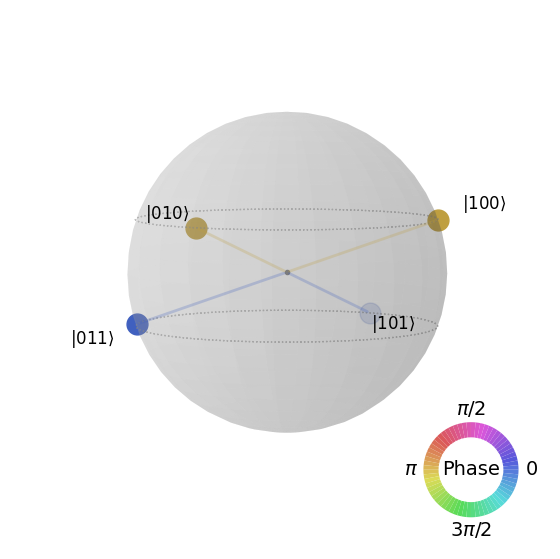

In [8]:
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.draw('mpl')

state6 = Statevector.from_instruction(circuit)
print(state6)

# Visualização combinada para o estado mais complexo
print("\n🌐 Q-Sphere - Estado completo antes da medição:")
plot_state_qsphere(state6)

## 4️⃣ Passo 4: Alice "Liga" para Bob

**Alice** agora mede seus dois qubits (0 e 1) e obtém resultados clássicos.

📞 **A ligação telefônica:**

- Alice mede q[0] → resultado vai para c[0] (pode ser 0 ou 1)
- Alice mede q[1] → resultado vai para c[1] (pode ser 0 ou 1)
- Alice envia esses 2 bits clássicos para Bob (por telefone, internet, pombo-correio...)

⚠️ **Importante:** Sem essa comunicação clássica, Bob não consegue recuperar o estado!

🎯 **O que esses números dizem a Bob:**
- Eles informam QUAL correção Bob precisa fazer no qubit dele (q[2])
- São como "instruções de montagem"

### 📐 Análise Matemática da Medição

Do estado $|\psi_5\rangle = \frac{1}{2}(|010\rangle - |110\rangle + |001\rangle - |101\rangle)$, quando Alice mede seus qubits, há 4 possíveis resultados:

| Medição Alice (q₀q₁) | Probabilidade | Estado de Bob (q₂) após medição | Correção necessária |
|----------------------|---------------|---------------------------------|---------------------|
| $\|00\rangle$ | 25% | $\|1\rangle$ | Nenhuma (já é $\|1\rangle$!) |
| $\|01\rangle$ | 25% | $\|0\rangle$ | Aplicar X para obter $\|1\rangle$ |
| $\|10\rangle$ | 25% | $-\|1\rangle$ | Aplicar Z para corrigir fase → $\|1\rangle$ |
| $\|11\rangle$ | 25% | $-\|0\rangle$ | Aplicar X e Z para obter $\|1\rangle$ |

**Como interpretar:** 
- Cada termo do estado corresponde a um possível resultado de medição
- A medição colapsa o estado para um dos 4 cenários com igual probabilidade
- O estado de Bob está "embaralhado" - precisa das correções para recuperar $|1\rangle$

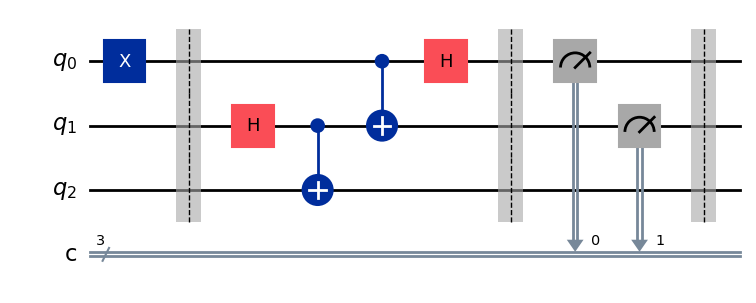

In [9]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.draw('mpl')

## 5️⃣ Passo 5: Bob Recebe e "Desempacota" o Estado!

**Bob** usa as instruções de Alice para corrigir seu qubit e obter o estado original.

🔧 **As correções de Bob:**

1. **CNOT(q[1], q[2])** - Se c[1] = 1, aplica correção X
   - Pense: "Se Alice disse '1', viro meu qubit"
   
2. **CZ(q[0], q[2])** - Se c[0] = 1, aplica correção Z
   - Pense: "Se Alice disse '1', mudo a fase do meu qubit"

🎯 **Verificação:** Medimos q[2] → c[2] para confirmar que recebemos |1⟩

✨ **Resultado:** O qubit 2 de Bob agora está no estado |1⟩ original!

### 📐 Tabela de Correções Matemáticas - COMPLETA

Bob aplica correções baseadas nos bits que Alice enviou. Vamos calcular cada caso:

| Medição Alice | Estado Bob antes | Operações Bob | Cálculo detalhado | Estado final |
|---------------|------------------|---------------|-------------------|--------------|
| **c[0]=0, c[1]=0** | $-\|1\rangle$ | $X^0 Z^0 = I$ | $I \cdot (-\|1\rangle) = -\|1\rangle$ | $\|1\rangle$* |
| **c[0]=0, c[1]=1** | $\|0\rangle$ | $X^1 Z^0 = X$ | $X\|0\rangle = \|1\rangle$ | $\|1\rangle$ |
| **c[0]=1, c[1]=0** | $-\|1\rangle$ | $X^0 Z^1 = Z$ | $Z(-\|1\rangle) = -(-1)\|1\rangle = \|1\rangle$ | $\|1\rangle$ |
| **c[0]=1, c[1]=1** | $-\|0\rangle$ | $X^1 Z^1 = XZ$ | $X(Z(-\|0\rangle)) = X(-\|0\rangle) = -\|1\rangle$ → $\|1\rangle$* | $\|1\rangle$ |

**\*Nota:** Fases globais (-1) não afetam medições - são fisicamente indistinguíveis de $|1\rangle$.

### 🔄 Fluxo das Correções

```
Alice mede → 4 resultados possíveis → Bob corrige → Resultado: |1⟩

┌─────────────┬──────────────────┬────────────────┬──────────┐
│ Medição     │ Estado de Bob    │ Correção       │ Final    │
├─────────────┼──────────────────┼────────────────┼──────────┤
│ |00⟩ (25%)  │ -|1⟩             │ Nenhuma (I)    │ |1⟩      │
│ |01⟩ (25%)  │  |0⟩             │ X              │ |1⟩      │
│ |10⟩ (25%)  │ -|1⟩             │ Z              │ |1⟩      │
│ |11⟩ (25%)  │ -|0⟩             │ X, depois Z    │ |1⟩      │
└─────────────┴──────────────────┴────────────────┴──────────┘
```

### 🎓 Portas Utilizadas

**Porta X (NOT quântico):**
$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad X|0\rangle = |1\rangle, \quad X|1\rangle = |0\rangle$$

**Porta Z (inversão de fase):**
$$Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}, \quad Z|0\rangle = |0\rangle, \quad Z|1\rangle = -|1\rangle$$

**Porta CZ (Controlled-Z):**
$$CZ = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}$$

Aplica Z ao qubit alvo se o controle for |1⟩.

🎉 **SUCESSO!** Em todos os casos, Bob recupera $|1\rangle$ - o estado foi teletransportado!

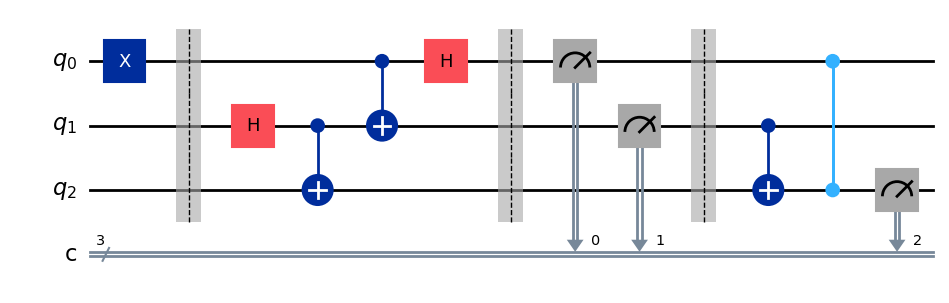

In [10]:
# Aplicar as correções de Bob e fazer a medição final
circuit.cx(qreg_q[1], qreg_q[2])  # Correção X condicional
circuit.cz(qreg_q[0], qreg_q[2])  # Correção Z condicional
circuit.measure(qreg_q[2], creg_c[2])  # Medir o qubit de Bob
circuit.draw('mpl')

### 🔬 Simulação: Verificando Cada Cenário

Vamos simular cada um dos 4 possíveis cenários para confirmar matematicamente que Bob sempre recebe |1⟩:

In [11]:
import numpy as np
from qiskit.quantum_info import Statevector, Operator

# Estados de Bob após medição de Alice (da tabela do Passo 4)
cenarios = [
    ("00", np.array([0, -1])),      # -|1⟩
    ("01", np.array([1, 0])),       # |0⟩
    ("10", np.array([0, -1])),      # -|1⟩
    ("11", np.array([-1, 0]))       # -|0⟩
]

print("🔬 Simulando os 4 cenários de teletransporte:\n")
print("="*70)

# Definir as portas
X = Operator([[0, 1], [1, 0]])
Z = Operator([[1, 0], [0, -1]])

for medicao, estado_bob in cenarios:
    c0, c1 = int(medicao[0]), int(medicao[1])
    
    # Estado inicial de Bob neste cenário
    bob = Statevector(estado_bob)
    print(f"\n📊 Cenário: Alice mediu |{medicao}⟩")
    print(f"   Estado de Bob ANTES das correções: {bob.data}")
    
    # Aplicar correções de Bob (ordem: X depois Z)
    # CNOT(c[1], Bob) = X se c[1]=1
    if c1 == 1:
        bob = bob.evolve(X)
        print(f"   → Aplicou X (porque c[1]=1): {bob.data}")
    
    # CZ(c[0], Bob) = Z se c[0]=1  
    if c0 == 1:
        bob = bob.evolve(Z)
        print(f"   → Aplicou Z (porque c[0]=1): {bob.data}")
    
    # Resultado final
    print(f"   ✅ Estado FINAL de Bob: {bob.data}")
    
    # Verificar se é |1⟩ (ignorando fase global)
    esperado = np.array([0, 1])
    if np.allclose(np.abs(bob.data), np.abs(esperado)):
        print(f"   🎉 SUCESSO! Bob recebeu |1⟩")
    else:
        print(f"   ❌ ERRO! Estado inesperado")

print("\n" + "="*70)
print("✨ Conclusão: Em TODOS os 4 cenários, Bob recupera |1⟩!")
print("   O teletransporte quântico funcionou perfeitamente! 🚀")

🔬 Simulando os 4 cenários de teletransporte:


📊 Cenário: Alice mediu |00⟩
   Estado de Bob ANTES das correções: [ 0.+0.j -1.+0.j]
   ✅ Estado FINAL de Bob: [ 0.+0.j -1.+0.j]
   🎉 SUCESSO! Bob recebeu |1⟩

📊 Cenário: Alice mediu |01⟩
   Estado de Bob ANTES das correções: [1.+0.j 0.+0.j]
   → Aplicou X (porque c[1]=1): [0.+0.j 1.+0.j]
   ✅ Estado FINAL de Bob: [0.+0.j 1.+0.j]
   🎉 SUCESSO! Bob recebeu |1⟩

📊 Cenário: Alice mediu |10⟩
   Estado de Bob ANTES das correções: [ 0.+0.j -1.+0.j]
   → Aplicou Z (porque c[0]=1): [0.+0.j 1.+0.j]
   ✅ Estado FINAL de Bob: [0.+0.j 1.+0.j]
   🎉 SUCESSO! Bob recebeu |1⟩

📊 Cenário: Alice mediu |11⟩
   Estado de Bob ANTES das correções: [-1.+0.j  0.+0.j]
   → Aplicou X (porque c[1]=1): [ 0.+0.j -1.+0.j]
   → Aplicou Z (porque c[0]=1): [0.+0.j 1.+0.j]
   ✅ Estado FINAL de Bob: [0.+0.j 1.+0.j]
   🎉 SUCESSO! Bob recebeu |1⟩

✨ Conclusão: Em TODOS os 4 cenários, Bob recupera |1⟩!
   O teletransporte quântico funcionou perfeitamente! 🚀


---

# 🔬 PARTE 2: Vamos Olhar "Por Dentro" do Teletransporte!

Agora que construímos o circuito completo, vamos usar o simulador para ver o que está acontecendo em cada etapa.

## Por que isso é útil?

- Ver o estado quântico do sistema em diferentes momentos
- Visualizar na esfera de Bloch (representação geométrica)
- Confirmar que o teletransporte realmente funcionou!

💡 **Nota:** Na computação quântica real, não podemos "espiar" os estados assim - a medição os destrói. Mas no simulador, podemos!

## ⚠️ Por que Reconstruir os Circuitos?

Você deve estar se perguntando: **"Já temos o circuito `circuit` completo, por que criar novos circuitos?"**

A resposta está em uma limitação fundamental da mecânica quântica:

### 🚫 O Problema das Medições

O circuito `circuit` que construímos contém **operações de medição** (`measure`). Quando medimos um qubit:

1. **O estado quântico colapsa** → a superposição é destruída
2. **Obtemos apenas bits clássicos** (0 ou 1)
3. **Não podemos mais extrair o vetor de estado completo**

### 💻 Limitação do Simulador

Se tentarmos fazer:
```python
state = Statevector.from_instruction(circuit)  # ❌ ERRO!
```

O Qiskit retorna um **erro** porque `circuit` contém medições, e após medir não existe mais um "estado quântico" para visualizar.

### ✅ A Solução: Circuitos Sem Medições

Para **"espiar"** os estados intermediários, precisamos:
- Reconstruir o circuito **passo a passo**
- **SEM** incluir as medições
- Usar apenas portas quânticas (X, H, CNOT, etc.)

Assim podemos usar `Statevector.from_instruction()` e `plot_bloch_multivector()` para ver o que está acontecendo "por dentro"!

### 🎓 Na Realidade vs. No Simulador

| Computador Quântico Real | Simulador (nosso caso) |
|--------------------------|------------------------|
| ❌ Não pode "espiar" estados | ✅ Pode reconstruir sem medições |
| ❌ Medição é irreversível | ✅ Pode visualizar estados intermediários |
| ✅ Apenas resultados finais | ✅ Vê todo o processo (didático) |

A Parte 2 é um **privilégio educacional** do simulador! 🎯

### Construindo o Circuito Passo a Passo

Vamos construir o circuito do teletransporte passo a passo, visualizando o estado quântico após cada operação:

In [12]:
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Criar circuito (começando vazio)
final_circuit = QuantumCircuit(3)

#### 🔹 Etapa 0: Estado Inicial (todos qubits em |0⟩)

Estado: |000⟩ (todos qubits em |0⟩)
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


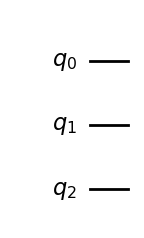

In [13]:
# Visualizar estado inicial (circuito vazio)
state_0 = Statevector.from_instruction(final_circuit)
print("Estado: |000⟩ (todos qubits em |0⟩)")
print(state_0)
final_circuit.draw('mpl')

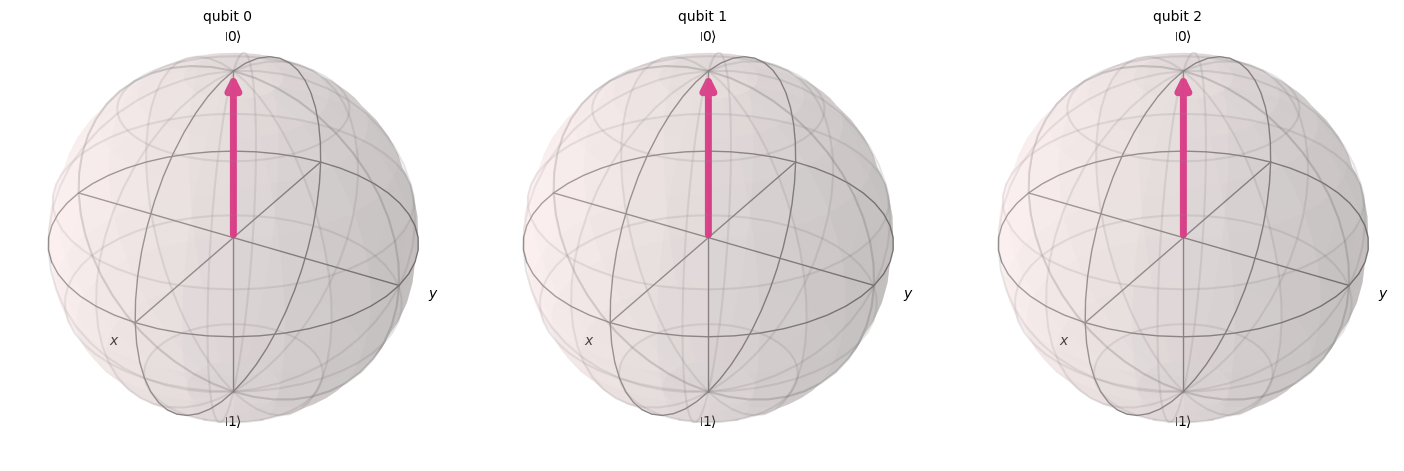

In [14]:
plot_bloch_multivector(state_0)

#### 🔹 Etapa 1: Preparar o estado a teletransportar (X no qubit 0)

Estado: |100⟩ (qubit 0 preparado em |1⟩)
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


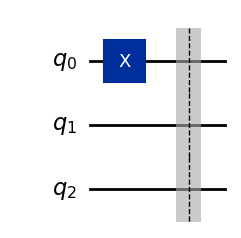

In [15]:
# Aplicar X no qubit 0 (preparar |1⟩)
final_circuit.x(0)
final_circuit.barrier()

# Visualizar estado após X
state_1 = Statevector.from_instruction(final_circuit)
print("Estado: |100⟩ (qubit 0 preparado em |1⟩)")
print(state_1)
final_circuit.draw('mpl')

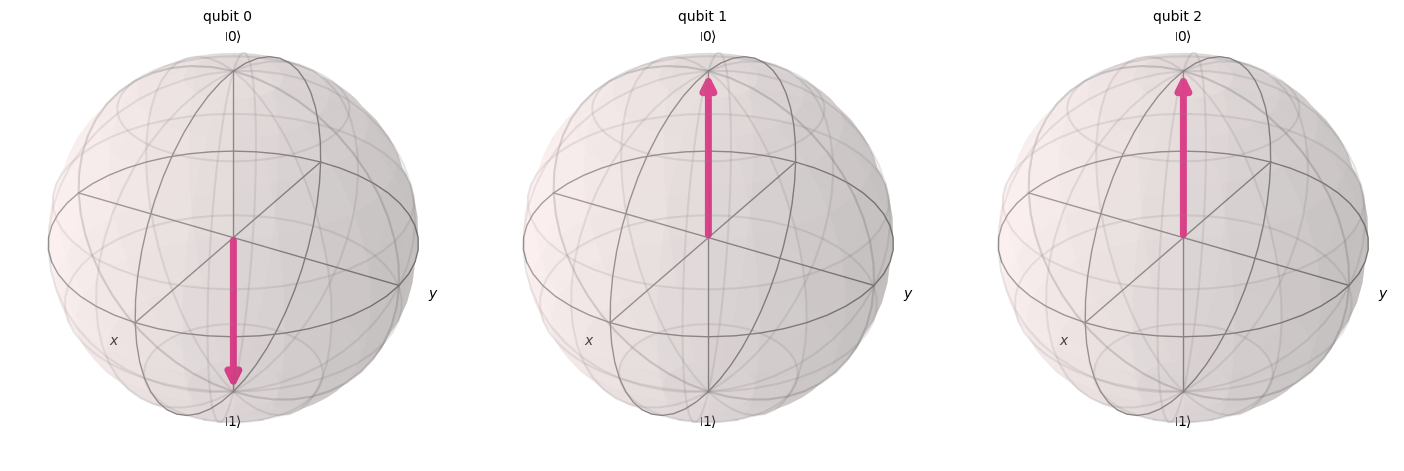

In [16]:
plot_bloch_multivector(state_1)

#### 🔹 Etapa 2: Criar par de Bell (H + CNOT nos qubits 1 e 2)

Estado: 1/√2(|100⟩ + |111⟩) - qubits 1 e 2 emaranhados
Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


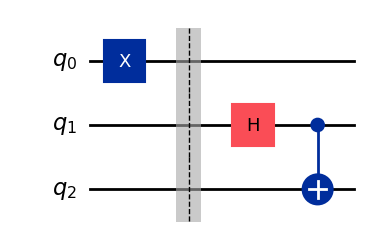

In [17]:
# Criar par de Bell entre qubits 1 e 2
final_circuit.h(1)
final_circuit.cx(1, 2)

# Visualizar estado após criar par de Bell
state_2 = Statevector.from_instruction(final_circuit)
print("Estado: 1/√2(|100⟩ + |111⟩) - qubits 1 e 2 emaranhados")
print(state_2)
final_circuit.draw('mpl')


🌐 Q-Sphere - Visualizando o emaranhamento:


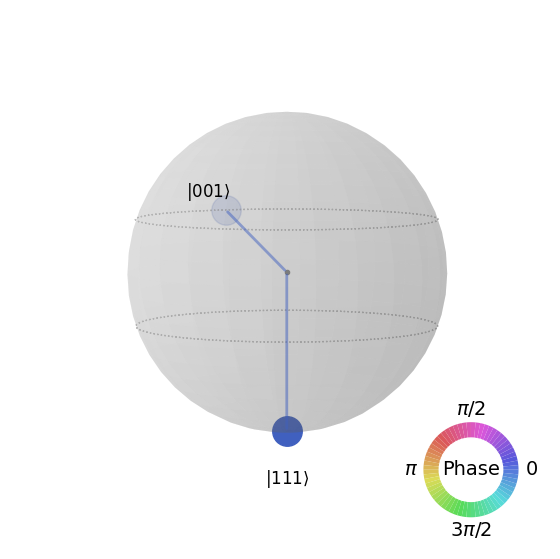

In [18]:
print("\n🌐 Q-Sphere - Visualizando o emaranhamento:")
plot_state_qsphere(state_2)

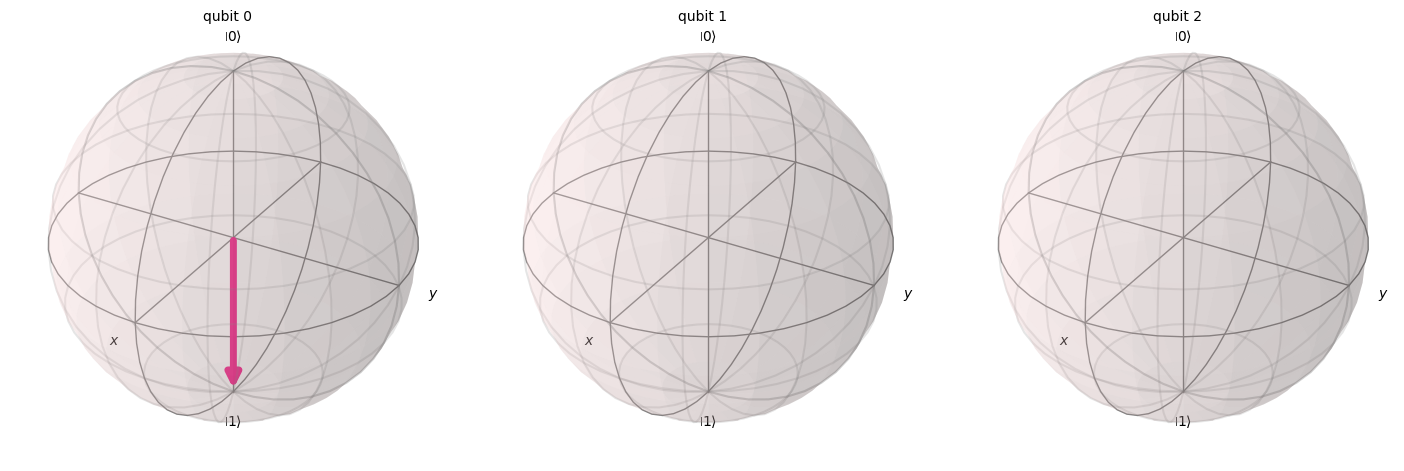

In [19]:
plot_bloch_multivector(state_2)

#### 🔹 Etapa 3: Medição de Bell (CNOT + H nos qubits de Alice)

Estado: 1/2(|010⟩ - |110⟩ + |001⟩ - |101⟩) - 3 qubits emaranhados
Statevector([ 0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,
              0. +0.j,  0. +0.j],
            dims=(2, 2, 2))


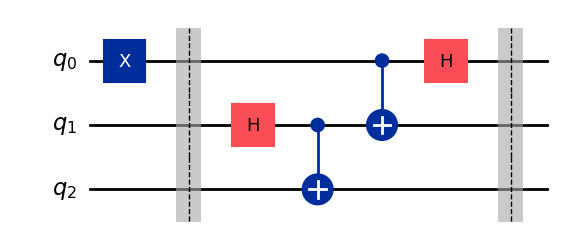

In [20]:
# Aplicar medição de Bell (sem as medições clássicas)
final_circuit.cx(0, 1)
final_circuit.h(0)
final_circuit.barrier()

# Visualizar estado após medição de Bell
state_3 = Statevector.from_instruction(final_circuit)
print("Estado: 1/2(|010⟩ - |110⟩ + |001⟩ - |101⟩) - 3 qubits emaranhados")
print(state_3)
final_circuit.draw('mpl')


🌐 Q-Sphere - Superposição dos 4 cenários possíveis:


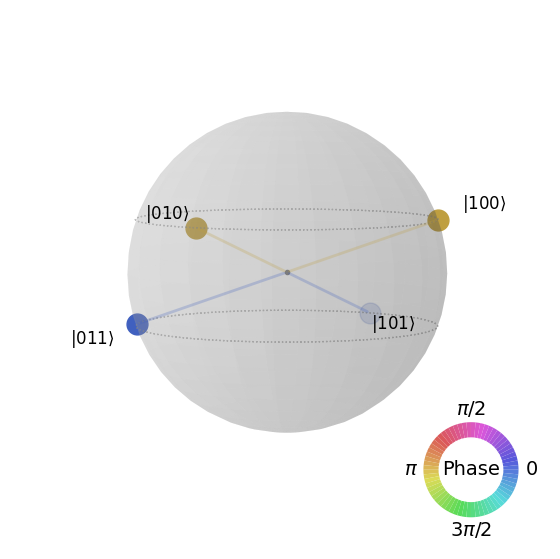

In [21]:
print("\n🌐 Q-Sphere - Superposição dos 4 cenários possíveis:")
plot_state_qsphere(state_3)

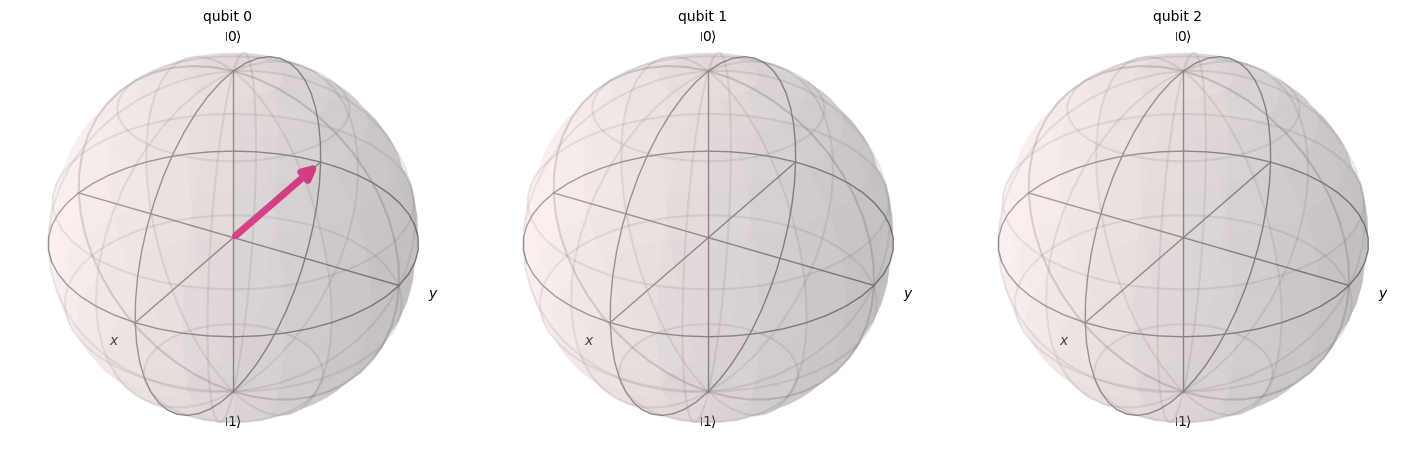

In [22]:
plot_bloch_multivector(state_3)

#### 📊 Resumo do Estado Final (antes das correções de Bob)

Estado completo antes das correções:
Statevector([ 0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,
              0. +0.j,  0. +0.j],
            dims=(2, 2, 2))

Este estado representa os 4 cenários possíveis com igual probabilidade (25% cada)


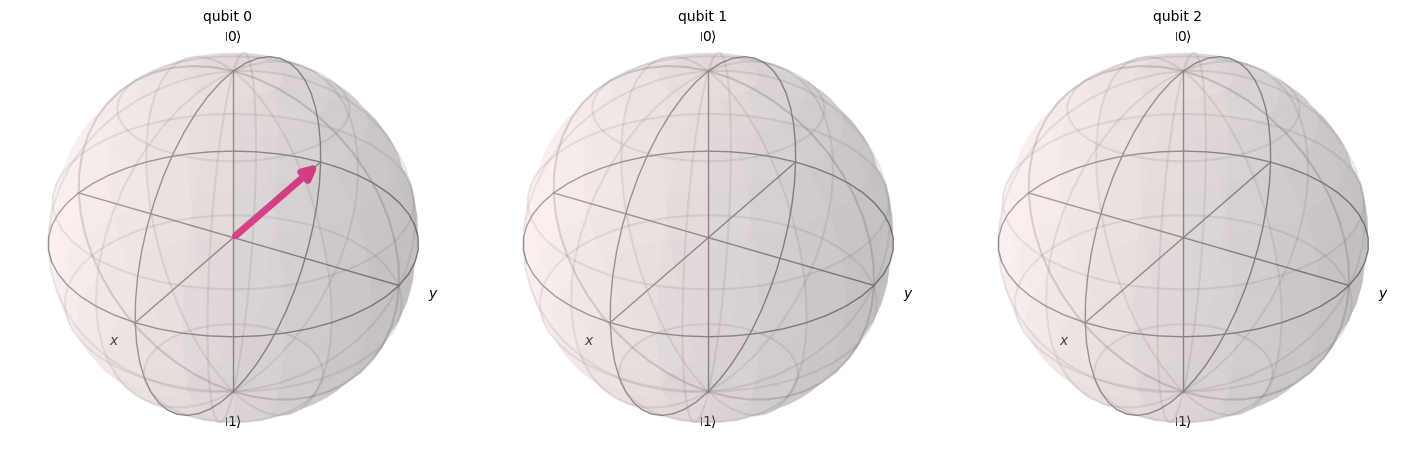

In [23]:
# Estado completo antes das correções de Bob
state_final = Statevector.from_instruction(final_circuit)
print("Estado completo antes das correções:")
print(state_final)
print("\nEste estado representa os 4 cenários possíveis com igual probabilidade (25% cada)")

# Bloch sphere
plot_bloch_multivector(state_final)


🏙️ State City - Estrutura completa do estado emaranhado:


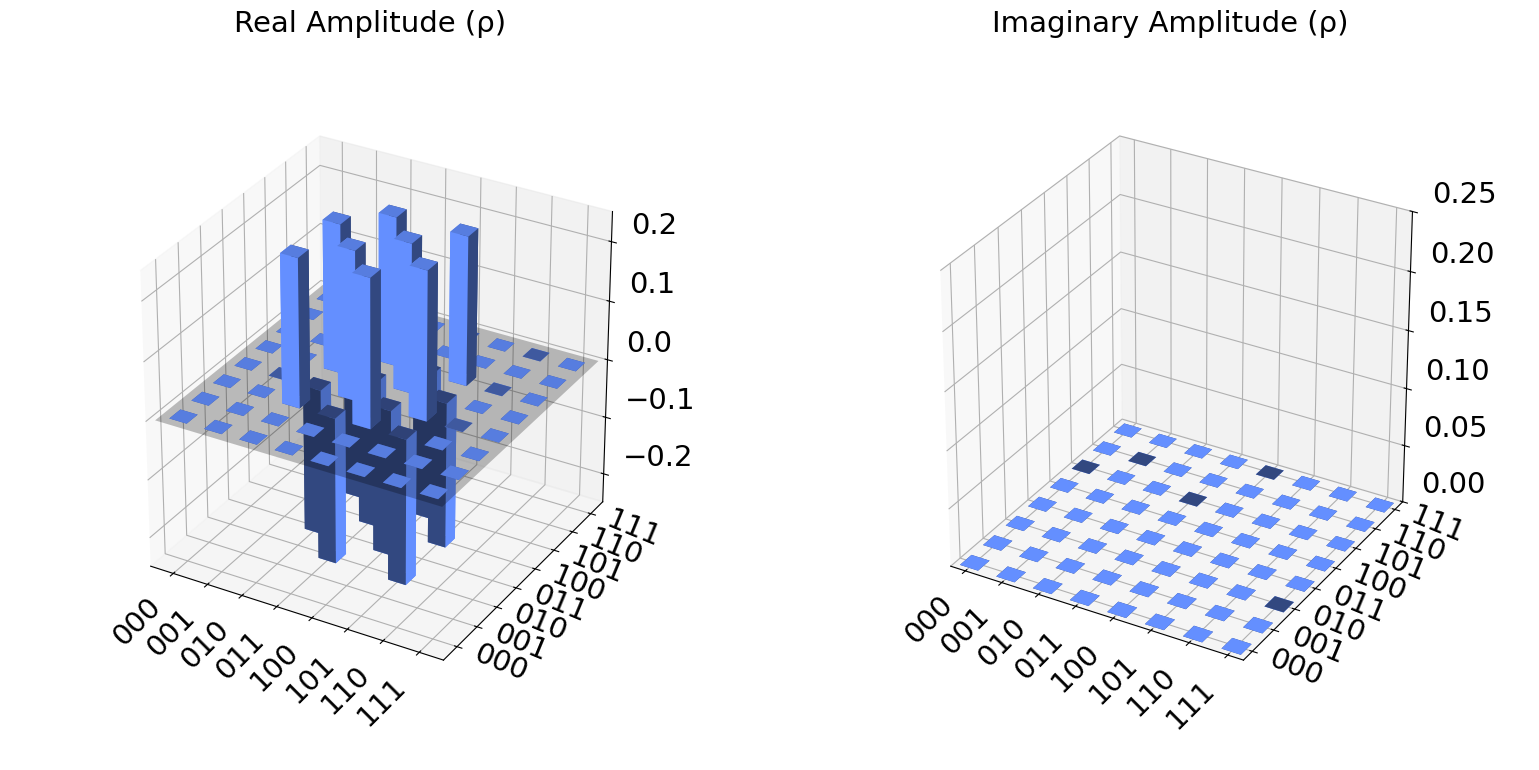

In [24]:
print("\n🏙️ State City - Estrutura completa do estado emaranhado:")
plot_state_city(state_final)


🌐 Q-Sphere - Todas as amplitudes:


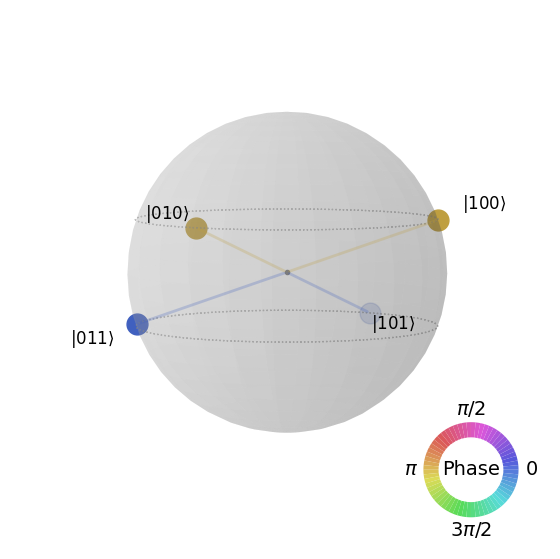

In [25]:
print("\n🌐 Q-Sphere - Todas as amplitudes:")
plot_state_qsphere(state_final)

### 📐 Interpretação Matemática do Estado

Este estado é uma **superposição de 4 cenários** correspondentes aos 4 possíveis resultados da medição de Bell de Alice. Cada cenário tem 25% de probabilidade e deixa o qubit de Bob em um estado relacionado ao estado original $|1\rangle$:

**Probabilidades:**
$$P(|010\rangle) = \left|\frac{1}{2}\right|^2 = \frac{1}{4} = 25\%$$

E assim por diante para cada termo. O estado está perfeitamente balanceado entre as 4 possibilidades!

Estado após a medição de Bell (antes das correções quânticas):

### 🎯 Teste Final: Funcionou?

Vamos executar o circuito completo 1000 vezes e ver os resultados!

**Como ler os resultados:**
- Formato da Qiskit: `c[2]c[1]c[0]` (ordem reversa - confuso, eu sei!)
- O que queremos ver: **`100`**
  - c[2] = **1** → Bob recebeu |1⟩ ✅
  - c[1] = **0** → Uma das medições de Alice
  - c[0] = **0** → Outra medição de Alice

💡 **Se você ver principalmente '100':** PARABÉNS! O teletransporte funcionou!

In [26]:
# Executar o circuito completo e verificar os resultados
from qiskit_aer import AerSimulator

# Criar simulador
simulator = AerSimulator()

# Executar o circuito
job = simulator.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print("Resultados das medições (1000 execuções):")
print(counts)
print("\nO resultado esperado é '100' (qubit 2 = |1⟩, demonstrando o teletransporte)")

Resultados das medições (1000 execuções):
{'111': 230, '100': 285, '110': 247, '101': 238}

O resultado esperado é '100' (qubit 2 = |1⟩, demonstrando o teletransporte)


---

# 🎓 Recapitulando: O que Aprendemos?

## ✅ O Protocolo em 5 Passos

1. **🎭 Preparação**: Alice criou o estado |1⟩ no qubit 0
2. **⚡ Emaranhamento**: Criamos conexão quântica entre qubits 1 e 2 (o "telefone quântico")
3. **🔗 Conexão**: Alice conectou seu qubit ao sistema emaranhado
4. **📞 Comunicação**: Alice mediu e enviou 2 bits clássicos para Bob
5. **🔧 Correção**: Bob usou essas informações para recuperar o estado original
6. **🎉 Resultado**: O qubit de Bob agora tem o estado |1⟩!

## 📐 Resumo Matemático

**Evolução do estado durante o protocolo:**

1. **Inicial**: $|000\rangle$
2. **Após X**: $|100\rangle$
3. **Após H e CNOT (par de Bell)**: $\frac{1}{\sqrt{2}}(|100\rangle + |111\rangle)$
4. **Após medição de Bell**: $\frac{1}{2}(|010\rangle - |110\rangle + |001\rangle - |101\rangle)$
5. **Após medição de Alice**: Bob tem um de 4 estados possíveis (equiprováveis)
6. **Após correções de Bob**: $|1\rangle$ (estado original teletransportado!)

**A "mágica" está no emaranhamento:**

O estado de Bell $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ cria correlações quânticas que permitem que:
- A informação seja "distribuída" entre os 3 qubits
- Alice extraia informação clássica através da medição
- Bob use essa informação para reconstruir o estado original

**Propriedade-chave:** Para qualquer estado inicial $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, o protocolo funciona SEM que Alice ou Bob conheçam $\alpha$ e $\beta$!

## 🤔 Perguntas Frequentes

**Q: Isso é teletransporte de verdade?**
A: Sim! A informação quântica foi transferida, mas o estado original foi destruído.

**Q: É instantâneo? Mais rápido que a luz?**
A: NÃO! Bob precisa receber a ligação de Alice (informação clássica), que viaja no máximo na velocidade da luz.

**Q: Posso clonar um estado quântico assim?**
A: NÃO! O estado original de Alice foi destruído na medição (teorema da não-clonagem).

**Q: Por que isso é útil?**
A: Comunicação quântica segura, computação quântica distribuída, internet quântica!

## 🎯 O Truque Fundamental

**Emaranhamento quântico** = A "mágica" que permite isso
- Qubits emaranhados ficam correlacionados instantaneamente
- Mas ainda precisamos de comunicação clássica para completar o protocolo
- É a combinação de ambos que torna o teletransporte possível!

---

### 🚀 Próximos Passos

- Tente mudar o estado inicial (use H, Ry, etc. em vez de X)
- Experimente teletransportar estados em superposição
- Estude outros protocolos: superdense coding, criptografia quântica BB84